In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dtime
import math
import seaborn as sns
from math import radians
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.cluster.vq import kmeans2, whiten
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification

In [3]:
#read in data
df = pd.read_csv("Train.csv", parse_dates=['incident_datetime'], index_col=False)

In [5]:
df.head()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type
0,2044-06-06 01:54:00,26.622589,-38.446780,1.0,0,LARCENY-FROM VEHICLE
1,2044-06-10 13:00:00,26.619337,-38.441202,1.0,13,LARCENY-NON VEHICLE
2,2044-02-25 09:00:00,26.616737,-38.444000,1.0,4,LARCENY-NON VEHICLE
3,2044-06-02 09:30:00,26.620286,-38.444994,1.0,33,LARCENY-NON VEHICLE
4,2044-03-16 19:20:00,26.626383,-38.443595,1.0,15,AUTO THEFT


In [6]:
#single out the features
df_features = df[['incident_datetime','incident_cord_x','incident_cord_y', 'num_victims', 'location_type']]

In [7]:
df_features.head()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type
0,2044-06-06 01:54:00,26.622589,-38.446780,1.0,0
1,2044-06-10 13:00:00,26.619337,-38.441202,1.0,13
2,2044-02-25 09:00:00,26.616737,-38.444000,1.0,4
3,2044-06-02 09:30:00,26.620286,-38.444994,1.0,33
4,2044-03-16 19:20:00,26.626383,-38.443595,1.0,15


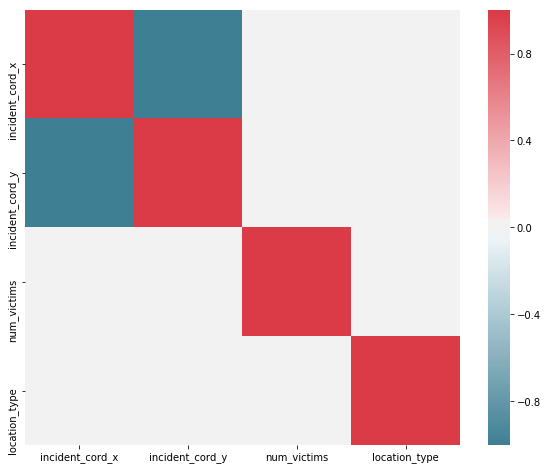

In [13]:
#correlation b/w features
f, ax = plt.subplots(figsize=(10, 8))
corr = df_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [15]:
# create new features by separating the timestamp
incident_year = df['incident_datetime'].dt.year
incident_month = df['incident_datetime'].dt.month
incident_day = df['incident_datetime'].dt.day
incident_hour = df['incident_datetime'].dt.hour

df['incident_year'] = incident_year
df['incident_month'] = incident_month
df['incident_day'] = incident_day
df['incident_hour'] = incident_hour
df['day_of_week'] = df['incident_datetime'].dt.dayofweek

In [469]:
df.head()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,incident_year,incident_month,incident_day,incident_hour,day_of_week
0,2044-06-06 01:54:00,26.622589,-38.446780,1.0,0,LARCENY-FROM VEHICLE,2044.0,6.0,6.0,1.0,0.0
1,2044-06-10 13:00:00,26.619337,-38.441202,1.0,13,LARCENY-NON VEHICLE,2044.0,6.0,10.0,13.0,4.0
2,2044-02-25 09:00:00,26.616737,-38.444000,1.0,4,LARCENY-NON VEHICLE,2044.0,2.0,25.0,9.0,3.0
3,2044-06-02 09:30:00,26.620286,-38.444994,1.0,33,LARCENY-NON VEHICLE,2044.0,6.0,2.0,9.0,3.0
4,2044-03-16 19:20:00,26.626383,-38.443595,1.0,15,AUTO THEFT,2044.0,3.0,16.0,19.0,2.0


In [26]:
#locating 0,0 coordinates to classify rape
#df[df['incident_cord_x']==0]

In [471]:
#locating 0 num_victims to classify homicide and replace with -1
#df = df.fillna(-1)
#df[df['num_victims']==-1]

In [472]:
#df[df['num_victims']==-1]

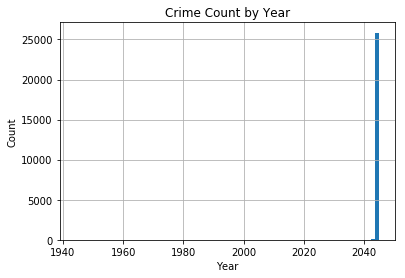

In [473]:
###crime count by year

df['incident_year'].hist(bins=70)
#plt.xlim([1940,2050])
#plt.ylim([0,29000])
plt.title("Crime Count by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

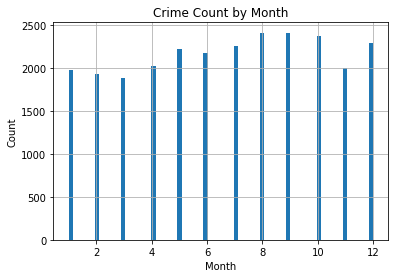

In [474]:
###crime count by month

df['incident_month'].hist(bins=70)
#plt.xlim([1940,2050])
#plt.ylim([0,29000])
plt.title("Crime Count by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

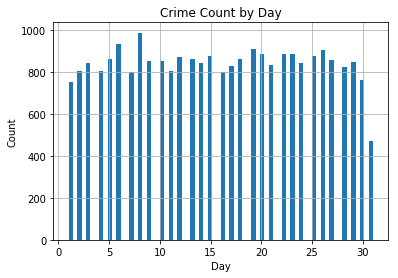

In [475]:
###crime count by day

df['incident_day'].hist(bins=70)
#plt.xlim([1940,2050])
#plt.ylim([0,29000])
plt.title("Crime Count by Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

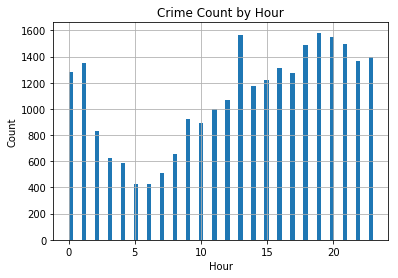

In [476]:
###crime count by hour

df['incident_hour'].hist(bins=70)
#plt.xlim([1940,2050])
#plt.ylim([0,29000])
plt.title("Crime Count by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

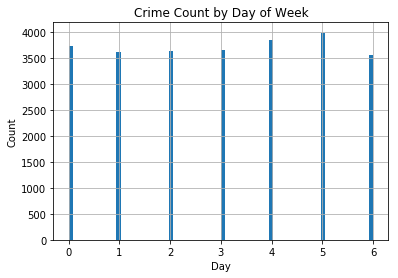

In [477]:
###crime count by day of week

df['day_of_week'].hist(bins=70)
#plt.xlim([1940,2050])
#plt.ylim([0,29000])
plt.title("Crime Count by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

In [478]:
df.head()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,incident_year,incident_month,incident_day,incident_hour,day_of_week
0,2044-06-06 01:54:00,26.622589,-38.446780,1.0,0,LARCENY-FROM VEHICLE,2044.0,6.0,6.0,1.0,0.0
1,2044-06-10 13:00:00,26.619337,-38.441202,1.0,13,LARCENY-NON VEHICLE,2044.0,6.0,10.0,13.0,4.0
2,2044-02-25 09:00:00,26.616737,-38.444000,1.0,4,LARCENY-NON VEHICLE,2044.0,2.0,25.0,9.0,3.0
3,2044-06-02 09:30:00,26.620286,-38.444994,1.0,33,LARCENY-NON VEHICLE,2044.0,6.0,2.0,9.0,3.0
4,2044-03-16 19:20:00,26.626383,-38.443595,1.0,15,AUTO THEFT,2044.0,3.0,16.0,19.0,2.0


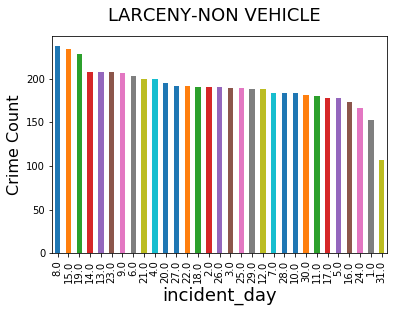

In [479]:
#plot crime type count per day
df[df['Crime_Type']=='LARCENY-NON VEHICLE'].incident_day.value_counts().plot(kind='bar')
plt.xlabel('incident_day', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.suptitle('LARCENY-NON VEHICLE', fontsize=18)
plt.show()

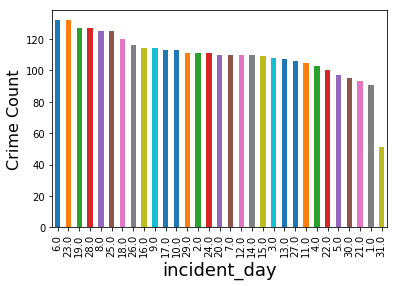

In [480]:
#plot crime type count per day
df[df['Crime_Type']=='AUTO THEFT'].incident_day.value_counts().plot(kind='bar')
plt.xlabel('incident_day', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

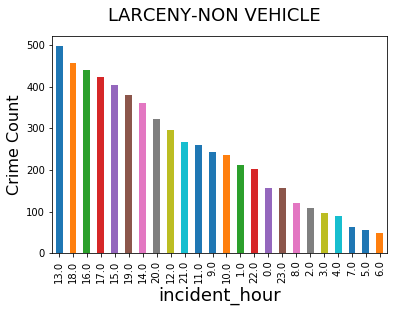

In [481]:
#plot crime type count per hour
df[df['Crime_Type']=='LARCENY-NON VEHICLE'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.suptitle('LARCENY-NON VEHICLE', fontsize=18)
plt.show()

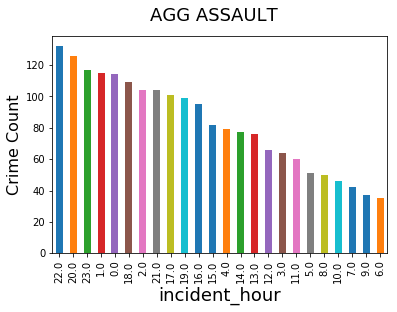

In [17]:
#plot crime type count per hour
df[df['Crime_Type']=='AGG ASSAULT'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.suptitle('AGG ASSAULT', fontsize=18)
plt.show()

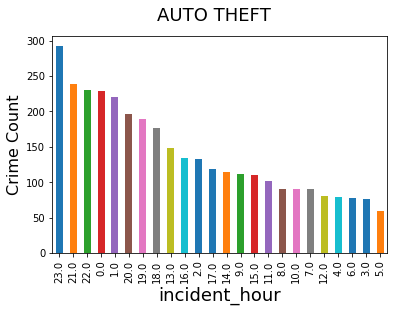

In [18]:
#plot crime type count per hour
df[df['Crime_Type']=='AUTO THEFT'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.suptitle('AUTO THEFT', fontsize=18)
plt.show()

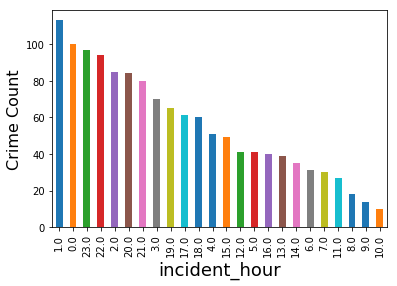

In [483]:
#plot crime type count per hour
df[df['Crime_Type']=='ROBBERY-PEDESTRIAN'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

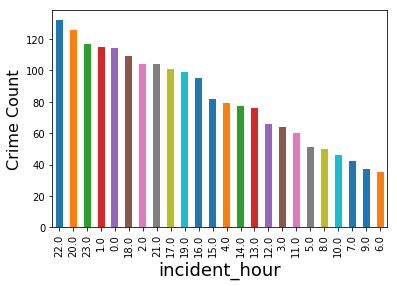

In [484]:
#plot crime type count per hour
df[df['Crime_Type']=='AGG ASSAULT'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

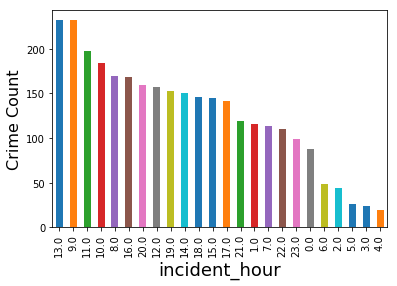

In [485]:
#plot crime type count per hour
df[df['Crime_Type']=='BURGLARY-RESIDENCE'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

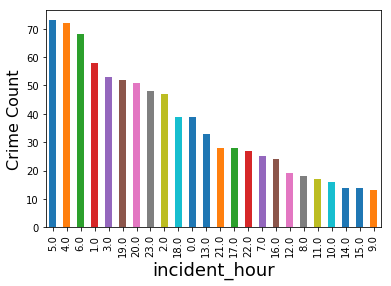

In [486]:
#plot crime type count per hour
df[df['Crime_Type']=='BURGLARY-NONRES'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

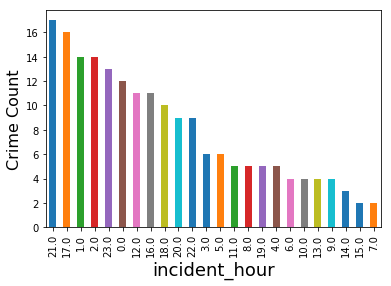

In [487]:
#plot crime type count per hour
df[df['Crime_Type']=='ROBBERY-RESIDENCE'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

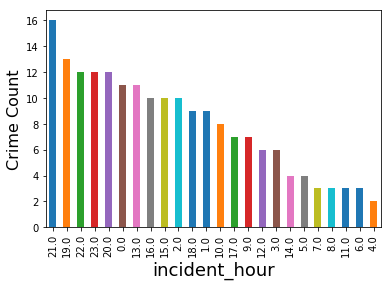

In [488]:
#plot crime type count per hour
df[df['Crime_Type']=='ROBBERY-COMMERCIAL'].incident_hour.value_counts().plot(kind='bar')
plt.xlabel('incident_hour', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.show()

In [549]:
#drop rows that contain NaT in incident_datetime column
df = df[pd.notnull(df['incident_datetime'])]

#drop rows with year values earlier than 2043, when observing dataset there were quite a few occurences in year 1944
df = df[df['incident_year'] >= 2044]

#remove incident_datetime column
df= df.drop(['incident_datetime'], axis = 1)

In [490]:
df.head()

,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,incident_year,incident_month,incident_day,incident_hour,day_of_week
0,26.622589,-38.446780,1.0,0,LARCENY-FROM VEHICLE,2044.0,6.0,6.0,1.0,0.0
1,26.619337,-38.441202,1.0,13,LARCENY-NON VEHICLE,2044.0,6.0,10.0,13.0,4.0
2,26.616737,-38.444000,1.0,4,LARCENY-NON VEHICLE,2044.0,2.0,25.0,9.0,3.0
3,26.620286,-38.444994,1.0,33,LARCENY-NON VEHICLE,2044.0,6.0,2.0,9.0,3.0
4,26.626383,-38.443595,1.0,15,AUTO THEFT,2044.0,3.0,16.0,19.0,2.0


Text(0.5,0.98,u'Count by Crime Type')

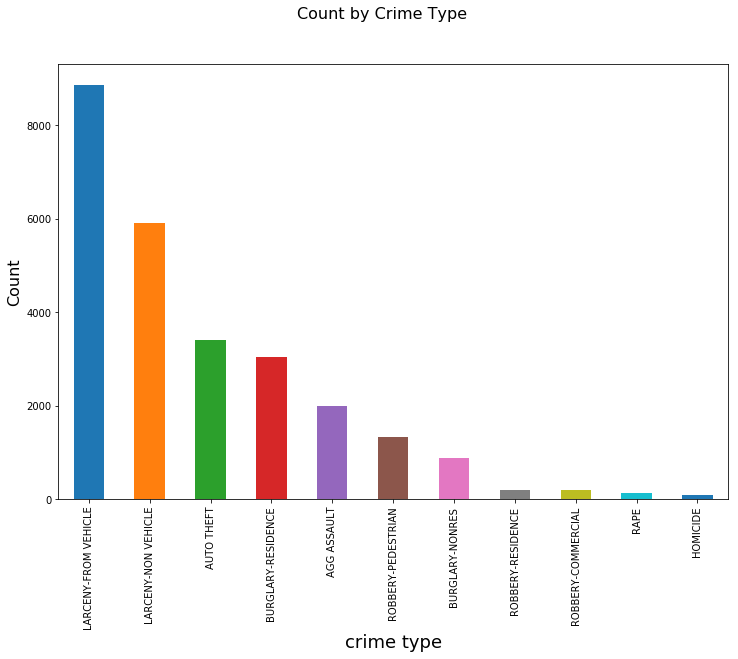

In [21]:
#number of crimes per location type
df.Crime_Type.value_counts().plot(kind='bar',figsize = (12,8))
plt.xlabel('crime type', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.suptitle('Count by Crime Type', fontsize=16)

Text(0.5,0.98,u'Crime per location type')

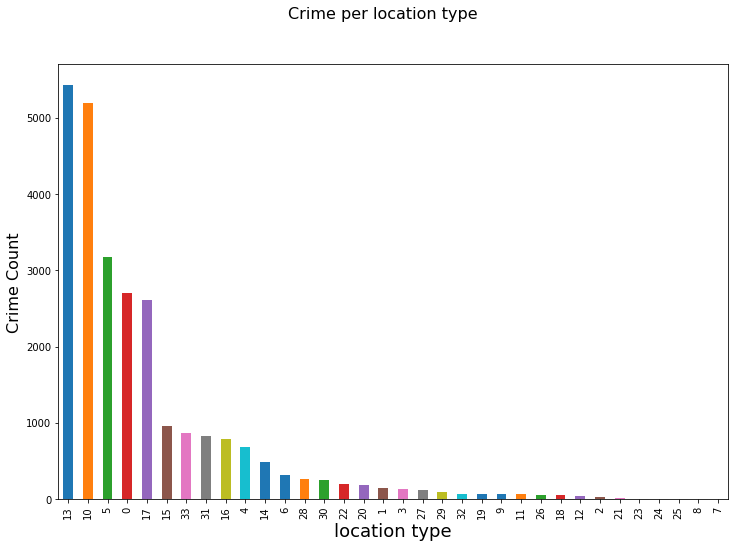

In [491]:
#number of crimes per location type
df.location_type.value_counts().plot(kind='bar',figsize = (12,8))
plt.xlabel('location type', fontsize=18)
plt.ylabel('Crime Count', fontsize=16)
plt.suptitle('Crime per location type', fontsize=16)

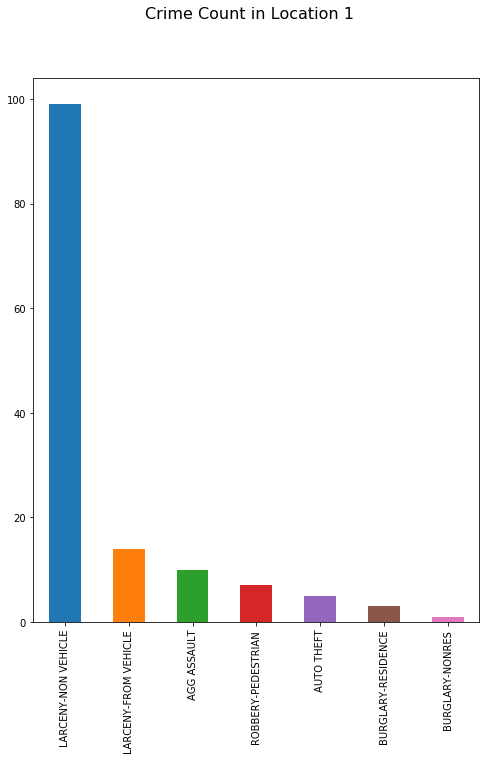

In [492]:
#value count per crime_type by location_type
def crime_by_location(i):
    df[df.location_type == i].Crime_Type.value_counts().plot(kind='bar',figsize=(8,10))
    plt.suptitle('Crime Count in Location 1', fontsize=16)

#look at crime in location 11 just for observation
crime_by_location(1)

In [494]:
#look at count per crime type
df.groupby(['Crime_Type']).size().reset_index(name='counts')

,Crime_Type,counts
0,AGG ASSAULT,1979
1,AUTO THEFT,3374
2,BURGLARY-NONRES,863
3,BURGLARY-RESIDENCE,3012
4,HOMICIDE,87
5,LARCENY-FROM VEHICLE,8836
6,LARCENY-NON VEHICLE,5847
7,RAPE,125
8,ROBBERY-COMMERCIAL,191
9,ROBBERY-PEDESTRIAN,1333


In [495]:
#average of number of victims per Crime Type
df.groupby('Crime_Type', as_index=False)['num_victims'].mean()

#from this observation we can see that homicide always has 0 number of victims. 
#This means that when predicting crime type if number of victims is 0, it is a homicide

,Crime_Type,num_victims
0,AGG ASSAULT,1.303183
1,AUTO THEFT,1.046236
2,BURGLARY-NONRES,1.106605
3,BURGLARY-RESIDENCE,1.151394
4,HOMICIDE,NaN
5,LARCENY-FROM VEHICLE,1.263694
6,LARCENY-NON VEHICLE,1.035745
7,RAPE,0.976000
8,ROBBERY-COMMERCIAL,1.696335
9,ROBBERY-PEDESTRIAN,1.220555


In [496]:
###### drop homicide category as the number of victims is always NaN for this type of crime

#df = df.fillna(-1)
#df[df['num_victims']==-1]
#df = df[df['num_victims']!=-1]

In [497]:
######drop category rape as its coordinates are 0
#df = df[df['incident_cord_x']!=0]
######this means when predicting crime type if the coordinates are 0,0 values we consider it as rape

In [550]:
###Drop the crimes except top 4
df = df[df['Crime_Type'] != 'RAPE']
df = df[df['Crime_Type'] != 'HOMICIDE']
df = df[df['Crime_Type'] != 'ROBBERY-COMMERCIAL']
df = df[df['Crime_Type'] != 'ROBBERY-RESIDENCE']
df = df[df['Crime_Type'] != 'BURGLARY-NONRES']
df = df[df['Crime_Type'] != 'ROBBERY-PEDESTRIAN']
df = df[df['Crime_Type'] != 'AGG ASSAULT']

In [552]:
#crime_type_enum={0:'AGG ASSAULT',1:'AUTO THEFT',2:'BURGLARY-NONRES',3:'BURGLARY-RESIDENCE',4:'LARCENY-FROM VEHICLE',5:'LARCENY-NON VEHICLE',6:'ROBBBERY-COMMERCIAL',7:'ROBBERY-PEDESTRIAN',8:'ROBBERY-RESIDENCE'}


#assign labels to crime_type

df['Crime_Type'] = pd.factorize(df['Crime_Type'])[0]

In [553]:
# cluster the x,y coordinates into zones
coords = df.as_matrix(columns=['incident_cord_x', 'incident_cord_y'])
kms_per_radian = 6371.0088
#0.027 is about two blocks of a city
epsilon = 0.027 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 19


In [554]:
#slice coordinates
df1 = df.iloc[:,0:2]

In [555]:
#Kmeans to cluster coordinates into zones
#chose 13 zones based on DBSCAN that we ran(cell above)
km = KMeans(n_clusters=19, init='k-means++', n_init=10)
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [556]:
#assign cluster labels to each row corresponding coordinate
x= km.fit_predict(df1)

In [557]:
#attach Cluster column to sliced out coordinate df
df1["Cluster"]= x
df1

,incident_cord_x,incident_cord_y,Cluster
0,26.622589,-38.446780,5
1,26.619337,-38.441202,14
2,26.616737,-38.444000,3
3,26.620286,-38.444994,11
4,26.626383,-38.443595,7
6,26.620970,-38.443753,9
7,26.627633,-38.445131,12
9,26.616127,-38.444486,13
10,26.618012,-38.443042,10
11,26.617632,-38.441790,2


In [558]:
#append Cluster column from df1 as a new column named zone to original df
df['Zone'] = df1['Cluster']
df.head()

,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,incident_year,incident_month,incident_day,incident_hour,day_of_week,Zone
0,26.622589,-38.446780,1.0,0,0,2044.0,6.0,6.0,1.0,0.0,5
1,26.619337,-38.441202,1.0,13,1,2044.0,6.0,10.0,13.0,4.0,14
2,26.616737,-38.444000,1.0,4,1,2044.0,2.0,25.0,9.0,3.0,3
3,26.620286,-38.444994,1.0,33,1,2044.0,6.0,2.0,9.0,3.0,11
4,26.626383,-38.443595,1.0,15,2,2044.0,3.0,16.0,19.0,2.0,7


In [559]:
####drop columns

df = df.drop(['incident_cord_x','incident_cord_y','incident_month', 'incident_year','incident_day' ,'day_of_week'], axis=1)

In [378]:
df.head()

,num_victims,location_type,Crime_Type,incident_hour,Zone
0,1.0,0,0,1.0,6
1,1.0,13,1,13.0,11
2,1.0,4,1,9.0,17
3,1.0,33,1,9.0,10
4,1.0,15,2,19.0,12


In [379]:
#features = zone, no victims, location type, hour
#response variable = crime type

In [560]:
df['Crime_Type']

0        0
1        1
2        1
3        1
4        2
6        0
7        0
9        0
10       1
11       1
12       0
13       0
14       2
15       0
16       0
17       2
18       3
19       3
20       1
21       0
22       0
23       2
24       2
25       1
26       0
27       0
28       0
30       1
31       2
32       0
        ..
25968    1
25969    3
25970    0
25971    0
25972    1
25973    1
25974    0
25975    0
25976    3
25977    1
25978    0
25979    3
25980    0
25981    0
25982    2
25983    0
25984    0
25986    1
25988    0
25989    2
25990    1
25991    0
25992    1
25993    3
25994    0
25995    0
25996    0
25997    3
25998    2
25999    0
Name: Crime_Type, Length: 21069, dtype: int64

In [561]:
##change the features to factors
#df['Hour'].astype('category')
#df['Crime_Type'] = pd.factorize(df['Crime_Type'])[0]
df['incident_hour'] = pd.factorize(df['incident_hour'])[0]
df['location_type'] = pd.factorize(df['location_type'])[0]
df['Zone']=pd.factorize(df['Zone'])[0]
df['num_victims']=pd.factorize(df['num_victims'])[0]

In [562]:
#rearrange columns
dfcrimetype = df
dfcrimetype = dfcrimetype.drop(['Crime_Type'],axis=1)
dfcrimetype['Crime_Type'] = df['Crime_Type']
df = dfcrimetype

In [563]:
df.head()

,num_victims,location_type,incident_hour,Zone,Crime_Type
0,0,0,0,0,0
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,2,3,1
4,0,4,3,4,2


In [564]:
#response variable
y = df['Crime_Type']
#input variables
X = df[['location_type','incident_hour','num_victims','Zone']]

In [565]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [ ]:
##############
#Linear Regression

In [389]:
#create linear regression object
#train the model using training sets
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [390]:
#make predictions using the testing set
test_y_pred = regr.predict(X_test)

In [391]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test,test_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, test_y_pred))

('Coefficients: \n', array([-0.02443, -0.0023 , -0.11617,  0.0095 ]))
Mean squared error: 1.12
Variance score: 0.02


In [392]:
df.head()

,num_victims,location_type,incident_hour,Zone,Crime_Type
0,0,0,0,0,0
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,2,3,1
4,0,4,3,4,2


In [ ]:
###################
#multinomial log regression

In [ ]:
#multinomial logistic regression
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

# Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr.predict(X_test))
 
print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test))

In [ ]:
###################
#Naive Bayes Classifier

In [ ]:
#Naive Bayes classifier
from sklearn.metrics import confusion_matrix
  
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print accuracy
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

In [ ]:
#################
#Decision Tree

In [ ]:
#training the DT using gini criterion
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=100, min_samples_leaf=2)
clf_gini.fit(X_train, y_train)

In [ ]:
#training the DT using entropy criterion
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=100, min_samples_leaf=2)
clf_entropy.fit(X_train, y_train)

In [ ]:
#fitting the DT for both criteria
y_pred = clf_gini.predict(X_test)
y_pred_en = clf_entropy.predict(X_test)

In [ ]:
print "Accuracy is ", accuracy_score(y_test,y_pred)*100
print "Accuracy is ", accuracy_score(y_test,y_pred_en)*100

In [ ]:
##################
#Random Forest

In [566]:
#features to run in rf model
features = df.columns[:4]
features

Index([u'num_victims', u'location_type', u'incident_hour', u'Zone'], dtype='object')

In [ ]:
#GRIDSEARCHCSV: this will help us optimize our parameters for Random Forest Model
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=20,
            oob_score=False, random_state=0, verbose=0, warm_start=False) 

param_grid = { 
            "n_estimators"      : [100,2000],
            "min_samples_split" : [2,10],
            "max_depth"         : [12,100]
            }


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print CV_rfc.best_params_

In [592]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=20,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [593]:
#fit the rf model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=20,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [569]:
#predicted crime_types
preds = clf.predict(X_test)

In [397]:
preds

array([1, 0, ..., 2, 0], dtype=int64)

In [399]:
#checking if there are 4 types of crime_types
np.unique(preds)

array([0, 1, 2, 3], dtype=int64)

In [570]:
#get accuracy score
accuracy_score(y_test,preds)*100

60.27527289985761

In [ ]:
################################
################################
#from here predicting the crime type for test file

In [571]:
#read in data
df_test = pd.read_csv("Test.csv", parse_dates=['incident_datetime'], index_col=False)

In [532]:
df_test

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type
0,2044-10-25 18:15:00,26.622022,-38.445293,3.0,13
1,2044-11-23 15:00:00,26.622188,-38.445322,1.0,13
2,2044-08-23 07:45:00,26.621044,-38.442797,2.0,15
3,2044-10-26 20:00:00,26.619823,-38.443968,2.0,10
4,2044-10-28 11:30:00,26.618534,-38.441873,1.0,10
5,2044-10-01 21:30:00,26.618831,-38.441928,2.0,10
6,2044-12-03 23:30:00,26.617177,-38.441998,1.0,20
7,2044-09-29 16:20:00,26.622588,-38.446752,1.0,31
8,2044-07-31 05:16:00,26.620697,-38.439587,1.0,17
9,2044-05-09 19:00:00,26.624990,-38.444943,1.0,13


In [572]:
# create new features by separating the timestamp
incident_year = df_test['incident_datetime'].dt.year
incident_month = df_test['incident_datetime'].dt.month
incident_day = df_test['incident_datetime'].dt.day
incident_hour = df_test['incident_datetime'].dt.hour

df_test['incident_year'] = incident_year
df_test['incident_month'] = incident_month
df_test['incident_day'] = incident_day
df_test['incident_hour'] = incident_hour
df_test['day_of_week'] = df_test['incident_datetime'].dt.dayofweek

In [534]:
df_test.head()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,incident_year,incident_month,incident_day,incident_hour,day_of_week
0,2044-10-25 18:15:00,26.622022,-38.445293,3.0,13,2044,10,25,18,1
1,2044-11-23 15:00:00,26.622188,-38.445322,1.0,13,2044,11,23,15,2
2,2044-08-23 07:45:00,26.621044,-38.442797,2.0,15,2044,8,23,7,1
3,2044-10-26 20:00:00,26.619823,-38.443968,2.0,10,2044,10,26,20,2
4,2044-10-28 11:30:00,26.618534,-38.441873,1.0,10,2044,10,28,11,4


In [22]:
#drop rows that contain NaT in incident_datetime column
df_test = df_test[pd.notnull(df_test['incident_datetime'])]

#drop rows with year values earlier than 2043, when observing dataset there were quite a few occurences in year 1944
df_test = df_test[df_test['incident_year'] >= 2044]

#remove incident_datetime column
df_test= df_test.drop(['incident_datetime'], axis = 1)

NameError: name 'df_test' is not defined

In [1]:
df_test.head()

NameError: name 'df_test' is not defined

In [ ]:
#single out RAPE type by locating (0,0) coordinates
df_test.loc[(df['incident_cord_x'] == 0), 'Crime_Type'] = 'RAPE'

In [ ]:
#single out HOMICIDE type by locating NaN num_victims
df_test.loc[(df['num_victims'] == 0), 'Crime_Type'] = 'HOMICIDE'

In [574]:
#slice coordinates
df1_test = df_test.iloc[:,0:2]

In [575]:
df1_test.head()

,incident_cord_x,incident_cord_y
0,26.622022,-38.445293
1,26.622188,-38.445322
2,26.621044,-38.442797
3,26.619823,-38.443968
4,26.618534,-38.441873


In [576]:
#Kmeans to cluster coordinates into zones
#chose 13 zones based on DBSCAN that we ran(cell above)
km_test = KMeans(n_clusters=19, init='k-means++', n_init=10)
km_test.fit(df1_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [577]:
#assign cluster labels to each row corresponding coordinate
x_test= km_test.fit_predict(df1_test)

In [578]:
#attach Cluster column to sliced out coordinate df
df1_test["Cluster"]= x_test
df1_test

,incident_cord_x,incident_cord_y,Cluster
0,26.622022,-38.445293,14
1,26.622188,-38.445322,14
2,26.621044,-38.442797,10
3,26.619823,-38.443968,6
4,26.618534,-38.441873,13
5,26.618831,-38.441928,13
6,26.617177,-38.441998,7
7,26.622588,-38.446752,14
8,26.620697,-38.439587,15
9,26.624990,-38.444943,4


In [579]:
#append Cluster column from df1 as a new column named zone to original df
df_test['Zone'] = df1_test['Cluster']
df_test.head()

,incident_cord_x,incident_cord_y,num_victims,location_type,incident_year,incident_month,incident_day,incident_hour,day_of_week,Zone
0,26.622022,-38.445293,3.0,13,2044,10,25,18,1,14
1,26.622188,-38.445322,1.0,13,2044,11,23,15,2,14
2,26.621044,-38.442797,2.0,15,2044,8,23,7,1,10
3,26.619823,-38.443968,2.0,10,2044,10,26,20,2,6
4,26.618534,-38.441873,1.0,10,2044,10,28,11,4,13


In [580]:
#drop columns
df_test = df_test.drop(['incident_cord_x','incident_cord_y','incident_month', 'incident_year','incident_day' ,'day_of_week'], axis=1)

In [581]:
df_test.head()

,num_victims,location_type,incident_hour,Zone
0,3.0,13,18,14
1,1.0,13,15,14
2,2.0,15,7,10
3,2.0,10,20,6
4,1.0,10,11,13


In [582]:
##change the features to factors
#df['Hour'].astype('category')
#df['Crime_Type'] = pd.factorize(df['Crime_Type'])[0]
df_test['incident_hour'] = pd.factorize(df_test['incident_hour'])[0]
df_test['location_type'] = pd.factorize(df_test['location_type'])[0]
df_test['Zone']=pd.factorize(df_test['Zone'])[0]
df_test['num_victims']=pd.factorize(df_test['num_victims'])[0]

In [594]:
preds_test = clf.predict(df_test)

In [591]:
preds_test

array(['LARCENY-FROM VEHICLE', 'LARCENY-FROM VEHICLE', ...,
       'LARCENY-FROM VEHICLE', 'BURGLARY-RESIDENCE'], dtype=object)

In [586]:
#reassign crime type names
preds_test = preds_test.astype('object')
preds_test[preds_test==0] = 'LARCENY-FROM VEHICLE'
preds_test[preds_test==1] = 'LARCENY-NON VEHICLE'
preds_test[preds_test==2] = 'AUTO THEFT'
preds_test[preds_test==3] = 'BURGLARY-RESIDENCE'

In [587]:
preds_test

array(['LARCENY-FROM VEHICLE', 'LARCENY-FROM VEHICLE', ...,
       'LARCENY-FROM VEHICLE', 'BURGLARY-RESIDENCE'], dtype=object)

In [588]:
#export to excel
df_final = pd.DataFrame(preds_test)
df_final.to_csv("C:/Users/wyj08/Desktop/Final_Results.csv",header=None,index=None)